$$\huge  \text{FFT gives you two arrays of coefficients}\ \alpha, \beta $$

$$ \huge \text{reconstruct original signal using} \left[ \alpha_{frequency} \sin() + \beta_{frequency} \cos()  \right] \ \text{for each component} $$

$$ \huge \alpha, \beta \ \text{happen to be the real and imaginary parts of the same} $$

In [200]:
from IPython.core.display import HTML

from IPython.display import display, Math
from IPython.display import Markdown, display

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

def pretty_out(st):
    display(HTML(f"<br><big><big><big><div style='padding: 15px; border: gray 2px solid'> {st} </div></big></big></big></center><br>"))

In [97]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal
import numpy as np

In [38]:
from memory_profiler import memory_usage

In [3]:
import RigolWFM.wfm as rigol

In [96]:
filename = 'data/rigol/31-10-waveform-1.wfm' # waveform-1 is 1200 ms long

scope = 'DS1000Z'

sf = rigol.Wfm.from_file(filename, scope)

time_scale = sf.channels[0].time_scale / 1e6
fs = 1.0/time_scale

y = sf.channels[0].volts

N = len(y)

In [185]:
pretty_out(f"Input data: <br>Sample rate = {fs :.0f} samples per second [{fs/1e6} Ms/s (Hz)] <br> Length: {N} samples ({N/fs :.1f} seconds)")
display(Markdown(r'$$\LARGE \text{Frequency resolution, per output bin:} \ \Delta_f = (f_s / N) = ' + f"{fs/N :.3f}" + r'\ \text{Hz}$$'))

$$\LARGE \text{Frequency resolution, per output bin:} \ \Delta_f = (f_s / N) = 0.833\ \text{Hz}$$

In [172]:
bin_frequencies = np.fft.fftfreq(N, d=time_scale)
print(max(spectrum_freqs))

4999999.166702221


In [193]:
ft = np.fft.fft(y)

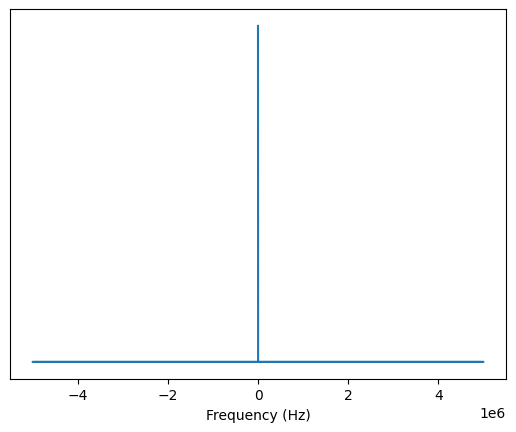

In [204]:
plt.plot(bin_frequencies, np.abs(ft)**2);
plt.gca().set_yticks([]);
plt.xlabel("Frequency (Hz)");

In [208]:
rft = np.fft.rfft(y)
print(len(rft))

6000257


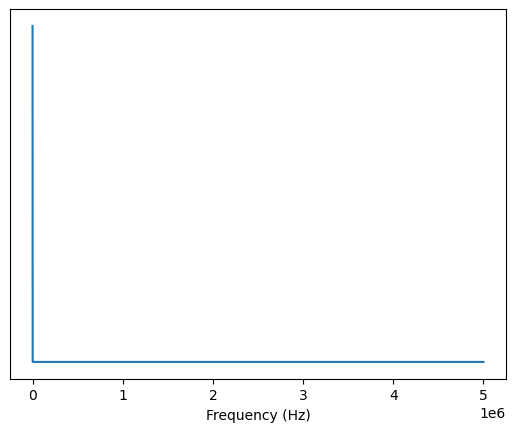

In [206]:
plt.plot((np.arange(N//2+1) * fs/N), np.abs(rft)**2);
plt.gca().set_yticks([]);
plt.xlabel("Frequency (Hz)");

4999999.166702221


In [67]:
rayleigh_frequency = 100

In [209]:
import czt
freq = np.linspace(10, 1000, 1188)
t = np.arange(len(y)) * time_scale
czt1 = lambda : czt.time2freq(t, y, freq)


In [32]:
def fft():
    np.fft.fft(y)

def rfft():
    np.fft.rfft(y)

CPU times: user 2.67 s, sys: 788 ms, total: 3.46 s
Wall time: 3.46 s


6000257

In [231]:
%%time
fft()

CPU times: user 2.78 s, sys: 1.02 s, total: 3.79 s
Wall time: 3.79 s


In [232]:
print(f"mem: {max(memory_usage(fft)) :0.2f} MiB")

mem: 8381.08 MiB


In [233]:
%%time 
rfft()

CPU times: user 2.83 s, sys: 752 ms, total: 3.59 s
Wall time: 3.58 s


In [234]:
print(f"mem: {max(memory_usage(rfft)) :0.2f} MiB")

mem: 8289.33 MiB


In [235]:
%%time
_, sig_f = czt.time2freq(t, y, freq)

CPU times: user 9.43 s, sys: 1.5 s, total: 10.9 s
Wall time: 10.9 s


In [236]:
print(f"mem: {max(memory_usage(czt1)) :0.2f} MiB")

mem: 8211.79 MiB


In [237]:
start_frequency, end_frequency = 10, 1000
No = int((end_frequency-start_frequency) // delta_f) 
# don't want to make up data, use the same # of bins as the fft

zft = signal.ZoomFFT(len(y), [start_frequency,end_frequency], m=No, fs=fs)

In [226]:
def _zft():
    zft_i(y)


UsageError: Line magic function `%%time` not found.


In [229]:
%%time
zft = signal.ZoomFFT(len(y), [start_frequency,end_frequency], m=No, fs=fs)
_zft()

CPU times: user 2.43 s, sys: 504 ms, total: 2.93 s
Wall time: 2.93 s


In [228]:
print(f"mem: {max(memory_usage(_zft)) :0.2f} MiB")

mem: 7385.28 MiB


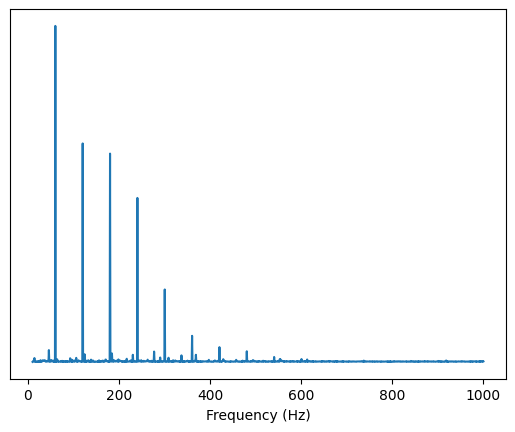

In [217]:
segment_bin_frequencies = np.linspace(f1, f2, No)
plt.plot(f, abs(zft(y))**2);
plt.gca().set_yticks([]);
plt.xlabel("Frequency (Hz)");

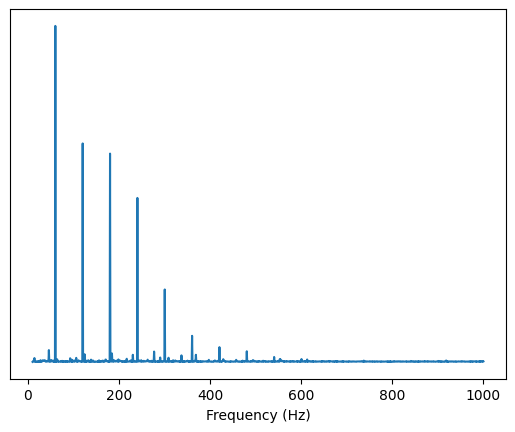